<a href="https://colab.research.google.com/github/tylerlum/Tray_Image_Classifier_A/blob/master/ReadData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install googledrivedownloader

In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1smbsz8AJ-VGhKbtr7NTvAVzTI3auI_C4',
                                    dest_path='./tray-data/file.7z')

!ls /content/tray-data

In [4]:
# Extract.7z file
!7z x /content/tray-data/file.7z 


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/tray-data/                             1 file, 987230795 bytes (942 MiB)

Extracting archive: /content/tray-data/file.7z
--
Path = /content/tray-data/file.7z
Type = 7z
Physical Size = 987230795
Headers Size = 38637
Method = LZMA2:26
Solid = +
Blocks = 1

  0%      3% 222 - data_HiRes/multi/L02_S1_S5/L2_S1_S5_091.png                                                        6% 378 - data_HiRes/multi/L05_L06_L10/L05_L06_L10_147.png                                                           

In [5]:
!mv data_HiRes tray-data

mv: cannot move 'data_HiRes' to 'tray-data/data_HiRes': Directory not empty


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import os
%cd /content/tray-data/data_HiRes/single
one_hot_encode = {}
types = [directory for directory in os.listdir('.')]
types.sort()
i = 0
for type in types:
  one_hot_encode[type] = i
  i = i + 1
print(one_hot_encode)
a = np.zeros((len(types), 1))
a[0] = 1
print(a)

/content/tray-data/data_HiRes/single
{'L01': 0, 'L02': 1, 'L03': 2, 'L04': 3, 'L05': 4, 'L06': 5, 'L07': 6, 'L08': 7, 'L09': 8, 'L10': 9, 'L11': 10, 'L12': 11, 'L13': 12, 'L14': 13, 'L15': 14, 'L16': 15, 'L17': 16, 'L18': 17, 'S1': 18, 'S2': 19, 'S3': 20, 'S4': 21, 'S5': 22}
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [10]:
%cd /content/tray-data/data_HiRes/single
import os
full_dataset = {}
P = 0
for directory in os.listdir('.'):
  x_data = []
  y_data = []
  for png in os.listdir('/content/tray-data/data_HiRes/single/' + directory):
    im = cv2.imread('/content/tray-data/data_HiRes/single/' + directory + '/' + png)
    x_data.append(im)
    a = np.zeros((len(types), 1))
    a[one_hot_encode[directory]] = 1
    y_data.append(a)
  full_dataset[str(directory) + "_x"] = x_data
  full_dataset[str(directory) + "_y"] = y_data
  


/content/tray-data/data_HiRes/single


(325, 325, 3)


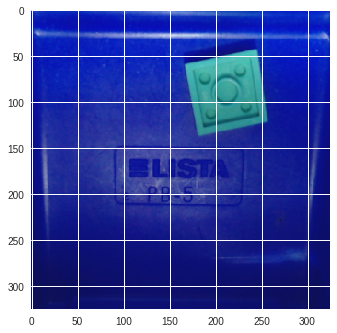

In [11]:
print(full_dataset['L11_x'][0].shape)
plt.imshow(full_dataset['L11_x'][10])

In [12]:
a = np.array([[1,2,3],[4,5,6]]) 

print('First array:')
print(a) 
print('\n')

print('Append elements to array:')
print(np.append(a, [7,8,9]) )
print('\n')  

print('Append elements along axis 0:')
print(np.append(a, [[7,8,9]],axis = 0))
print('\n')

print('Append elements along axis 1:')
print(np.append(a, [[5,5,5],[7,8,9]],axis = 1))

First array:
[[1 2 3]
 [4 5 6]]


Append elements to array:
[1 2 3 4 5 6 7 8 9]


Append elements along axis 0:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


Append elements along axis 1:
[[1 2 3 5 5 5]
 [4 5 6 7 8 9]]


In [0]:
a = np.array([full_dataset['L11_x'][0]])
b = np.append(a, [full_dataset['L11_x'][10]], axis=0)

In [13]:
print(a.shape)
print(b.shape)
plt.imshow(b[0])
#plt.imshow(b[1])

(2, 3)


NameError: ignored

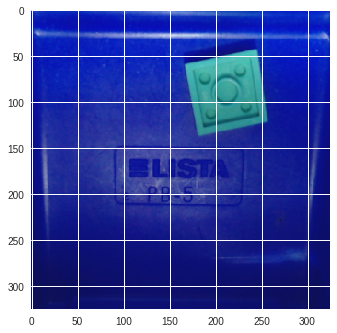

In [68]:
plt.imshow(b[1])

In [88]:
keys_x = [key for key in full_dataset if not key.find("_x") == -1]
keys_x.sort()
print(keys_x)

keys_y = [key for key in full_dataset if not key.find("_y") == -1]
keys_y.sort()
print(keys_y)

all_x = None
for key_x in keys_x:
  for im in full_dataset[key_x]:
    if all_x is None:
      all_x = np.array([im])
    else:
      all_x = np.append(all_x, [im], axis=0)
    print(all_x.shape)


['L01_x', 'L02_x', 'L03_x', 'L04_x', 'L05_x', 'L06_x', 'L07_x', 'L08_x', 'L09_x', 'L10_x', 'L11_x', 'L12_x', 'L13_x', 'L14_x', 'L15_x', 'L16_x', 'L17_x', 'L18_x', 'S1_x', 'S2_x', 'S3_x', 'S4_x', 'S5_x']
['L01_y', 'L02_y', 'L03_y', 'L04_y', 'L05_y', 'L06_y', 'L07_y', 'L08_y', 'L09_y', 'L10_y', 'L11_y', 'L12_y', 'L13_y', 'L14_y', 'L15_y', 'L16_y', 'L17_y', 'L18_y', 'S1_y', 'S2_y', 'S3_y', 'S4_y', 'S5_y']
(1, 325, 325, 3)
(2, 325, 325, 3)
(3, 325, 325, 3)
(4, 325, 325, 3)
(5, 325, 325, 3)
(6, 325, 325, 3)
(7, 325, 325, 3)
(8, 325, 325, 3)
(9, 325, 325, 3)
(10, 325, 325, 3)
(11, 325, 325, 3)
(12, 325, 325, 3)
(13, 325, 325, 3)
(14, 325, 325, 3)
(15, 325, 325, 3)
(16, 325, 325, 3)
(17, 325, 325, 3)
(18, 325, 325, 3)
(19, 325, 325, 3)
(20, 325, 325, 3)
(21, 325, 325, 3)
(22, 325, 325, 3)
(23, 325, 325, 3)
(24, 325, 325, 3)
(25, 325, 325, 3)
(26, 325, 325, 3)
(27, 325, 325, 3)
(28, 325, 325, 3)
(29, 325, 325, 3)
(30, 325, 325, 3)
(31, 325, 325, 3)
(32, 325, 325, 3)
(33, 325, 325, 3)
(34, 325,

KeyboardInterrupt: ignored

In [96]:
i = 0
all_y = None
for key_y in keys_y:
  for data in full_dataset[key_y]:
    i = i+1
print(i)
    #if all_y is None:
    #  all_y = np.array([data])
    #else:
    #  all_y = np.append(all_y, [data], axis=1)
    #print(all_y.shape)

3847


In [89]:
print(all_x.shape)

(3668, 325, 325, 3)


In [93]:
print(all_y[0,1,0])

0.0


In [0]:
all_x_copy = all_x


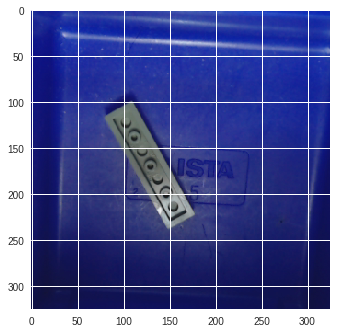

In [101]:
x = all_x_copy[1]
plt.imshow(x)

In [0]:
all_x = np.zeros((3847, 325, 325, 3))
print(all_x[0].shape)